In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


# Cargando las imágenes de la cámara
En la carpeta "video" hay una secuencia de imágenes de un pequeño circuíto. Las vamos a cargar en una lista de imágenes para procesarlas todas con el algoritmo de las anteriores fases

In [2]:
first_image = 438 
last_image = 473
images = []
for x in range(first_image, last_image + 1):
    images.append(ndimage.imread('video/%04d.jpg' % x, mode='L'))

# Extrayendo la dirección basado en la imagen
Símplemente es aplicar los algorimos que hemos visto, puede parecer complicado pero son apenas 5 líneas

In [3]:
shape = images[0].shape # asumimos todas las imagenes iguales
dirs = []
for i in images: 
    im = i.copy()
    # descartamos el fondo y nos quedamos con el color de la línea
    im[im < 128] = 0
    im[im >= 128] = 255
    # regressión linear para obtener la linea
    x, y = np.where(im == 0)
    pfd = np.polyfit(x, y, 1)
    xx = np.poly1d(pfd)
    # finalmente extraer la dirección que debe tomar el coche basado en la línea
    dir = xx(shape[0] * 0.5) / shape[1] - 0.5
    dirs.append(dir)
    
    




# Visualizando la progresión
Podemos visualizar la dirección que toma en cada punto en una gráfica. Se ve como es más o menos suave (y así debería ser)

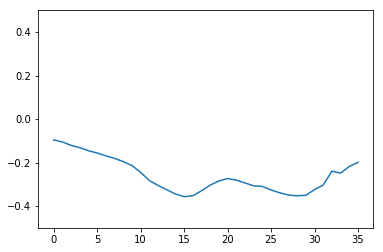

In [4]:
plt.ylim((-0.5, 0.5))
plt.plot(dirs)

# Visualización avanzada
También se puede visualizar la dirección en un video para analizar si tiene o no sentido

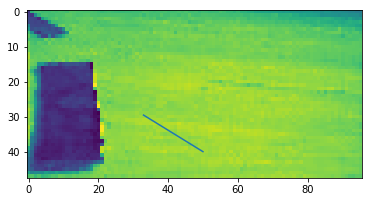

In [5]:
from IPython.display import HTML
import math
import matplotlib.animation as animation

fig = plt.figure()
c = 0

im = plt.imshow(images[0], animated=True)
line = plt.plot([0, 0], [0, 0])[0]

def updatefig(*args):
    global c
    c = (c + 1) % len(images)
    dir = dirs[c]
    im.set_array(images[c])
    line.set_data([50, 50 -  math.cos(math.pi/2 + math.pi*dir) * 20], [40, 40 - math.sin(math.pi/2 + math.pi*dir) * 20])

    return im,

anim = animation.FuncAnimation(fig, updatefig, interval=200, blit=True)

HTML(anim.to_html5_video())
